# Exercises

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import seaborn as sns
import sys
from tqdm import tqdm
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

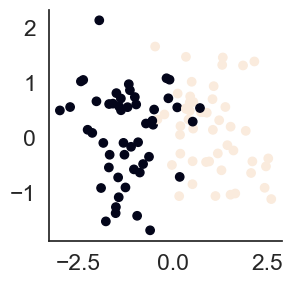

In [2]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)
plt.figure(figsize=(3,3))
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.show()

In [3]:
C_values = np.arange(0.1,5.0,0.1)

n_splits = 10

X, y = X_nsep,y_nsep 

avg_performance = []
std_performance = []

for C_value in tqdm(C_values):
    # setting 2-fold cross validation
    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_model = svm.SVC(kernel='linear',C=C_value);
        svc_model.fit(X_train, y_train)
        fold_performance.append(svc_model.score(X_test,y_test))
    
    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

avg_performance = np.asarray(avg_performance)
std_performance = np.asarray(std_performance)

print(np.mean(avg_performance))

100%|███████████████████████████████████████████| 49/49 [00:00<00:00, 65.04it/s]

0.9089795918367347


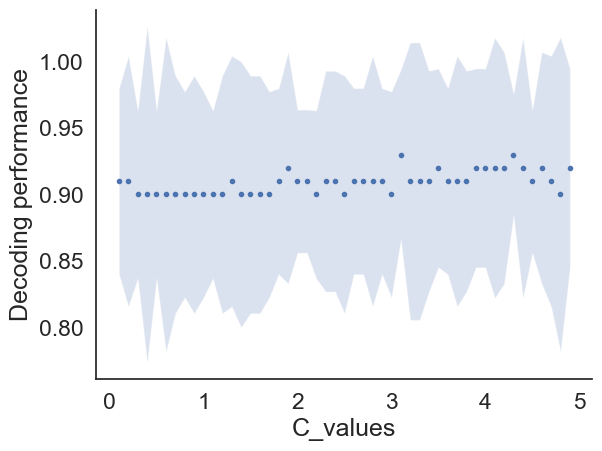

In [4]:
plt.plot(C_values, avg_performance, '.')
plt.fill_between(C_values,avg_performance-std_performance,
                 avg_performance+std_performance,alpha=0.2)
plt.xlabel('C_values')
plt.ylabel('Decoding performance')
plt.show()

I have tried several things, but the C value doesn't really seem to change anything. When I took more splits and more data points it was even a straight line.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [5]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

In [6]:
C_values = np.arange(0.1,5.0,0.1)

n_splits = 10

X, y = X_nsep,y_nsep 

avg_performance = []
std_performance = []

for C_value in tqdm(C_values):
    # setting 2-fold cross validation
    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_model = svm.SVC(kernel='rbf',C=C_value);
        svc_model.fit(X_train, y_train)
        fold_performance.append(svc_model.score(X_test,y_test))
    
    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

avg_performance = np.asarray(avg_performance)
std_performance = np.asarray(std_performance)

print(np.mean(avg_performance))

100%|███████████████████████████████████████████| 49/49 [00:00<00:00, 60.79it/s]

0.8681632653061224


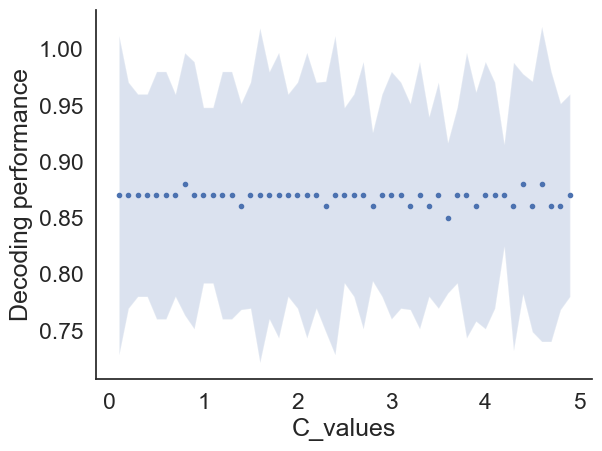

In [7]:
plt.plot(C_values, avg_performance, '.')
plt.fill_between(C_values,avg_performance-std_performance,
                 avg_performance+std_performance,alpha=0.2)
plt.xlabel('C_values')
plt.ylabel('Decoding performance')
plt.show()

### Since for both the C_value does not matter we will take C=1

In [8]:
def linear_SVM(X,y):
    avg_performance = []
    std_performance = []
    
    n_splits = 10

    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_model = svm.SVC(kernel='linear',C=1);
        svc_model.fit(X_train, y_train)
        fold_performance.append(svc_model.score(X_test,y_test))
    
    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

    return avg_performance, std_performance

def rbf_SVM(X,y):
    
    
    n_splits = 10

    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_model = svm.SVC(kernel='rbf',C=1);
        svc_model.fit(X_train, y_train)
        fold_performance.append(svc_model.score(X_test,y_test))
    
    avg_performance = np.mean(fold_performance)
    std_performance = np.std(fold_performance)

    return avg_performance, std_performance

In [9]:
lin_avg = []
lin_std = []

rbf_avg = []
rbf_std = []

stds = np.arange(0.8, 1.0, 0.02)

for std in tqdm(stds):
    X,y = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=std)
    lavg, lstd = linear_SVM(X,y)
    lin_avg.append(lavg)
    lin_std.append(lstd)
    ravg, rstd = rbf_SVM(X,y)
    rbf_avg.append(ravg)
    rbf_std.append(rstd)
    
lin_avg = np.asarray(lin_avg)
lin_std = np.asarray(lin_std)
rbf_avg = np.asarray(rbf_avg)
rbf_std = np.asarray(rbf_std)

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 29.74it/s]


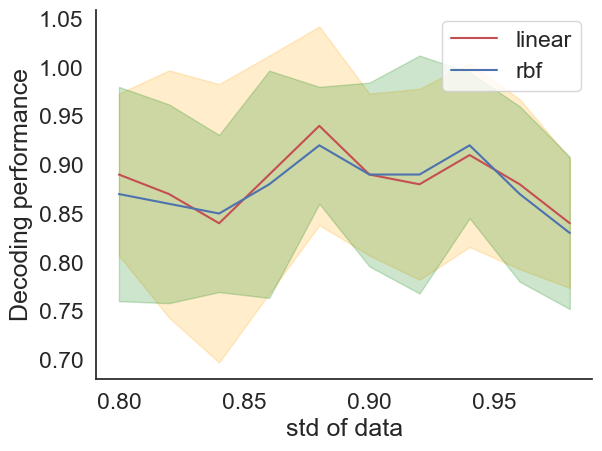

In [10]:
plt.plot(stds, lin_avg, 'r', label='linear')
plt.fill_between(stds,(lin_avg-lin_std)[:,0],
                 (lin_avg+lin_std)[:,0],alpha=0.2, color='orange')
plt.plot(stds, rbf_avg, 'b', label='rbf')
plt.fill_between(stds,rbf_avg-rbf_std,
                 rbf_avg+rbf_std,alpha=0.2, color='green')
plt.legend()
plt.xlabel('std of data')
plt.ylabel('Decoding performance')
plt.show()

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

In [11]:
s_rate = 10000 # the sampling rate of our emulated recording system
n_stim = 50 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

n_stim_type = 2; # number of different stimuli
average_firing_rate = 5; # average firing rate across the population

def data_func(noise_rate = 1, sigma_stim = 0.5, n_cells = 20):
    

    # generate baseline rates from exponential distirbution
    cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

    # create stimulus average responses, perturbing the population firng rate profile
    # we use a multiplicative modulation in opposite directions for the two stimuli
    modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
    cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
    # sets negative firng rate to 0
    cell_rate_stim[1][cell_rate_stim[1]<0]=0
    cell_rate_stim[2][cell_rate_stim[2]<0]=0
    
    # simulate spiking activity


    stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
    stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
    np.random.shuffle(stim_type)

    time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
        for i,stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
            spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

        spike_times.append(time[spikes>0])
    
    print('making data')
    
    y = np.zeros_like(time)
    for i, stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        y[stim_idxs] = stimulus
        
    print('y done')

    X = np.zeros(shape=(n_cells, len(time)))
    for i in range(0,n_cells):  # had a tqdm
        spikes_cell = spike_times[i]
        tmp = np.zeros_like(time)
        for x in spikes_cell:
            tmp[np.where(time==x)] = 1
        X[i] = tmp
    X = X.T

    print('X done')
    
    return X,y

In [12]:
def rbf_SVM(X,y):
    n_splits = 5

    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []

    print('0')
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print('1')
        svc_model = svm.LinearSVC(max_iter=1000)
        print('2')
        svc_model.fit(X_train, y_train)
        print('3')
        fold_performance.append(svc_model.score(X_test,y_test))
        print('4')
    
    avg_performance = np.mean(fold_performance)
    std_performance = np.std(fold_performance)

    return avg_performance, std_performance

data_func(noise_rate = 1, sigma_stim = 0.5, n_cells = 20)

15:59

In [13]:
#noise_rate_lst = [0.5, 1, 3, 5]

#avg_noises = []
#std_noises = []

#for noise in tqdm(noise_rate_lst):
#    X, y = data_func(noise_rate=noise)
#    print('going into svm')
#    avg, std = rbf_SVM(X,y)
#    avg_noises.append(avg)
#    std_noises.append(std)

making X: 1:40 min
fitting SVM: 2:40 min, 2:30 min, 2:34 min

In [15]:
#plt.plot(noise_rate_lst, avg_noises, '.--')
#plt.ylim(0.6, 0.61)

In [16]:
sigma_stim_lst = [0.2, 0.5, 0.7, 0.9]

avg_sigmas = []
std_sigmas = []

for sigma in tqdm(sigma_stim_lst):
    X, y = data_func(sigma_stim=sigma)
    avg, std = rbf_SVM(X,y)
    avg_sigmas.append(avg)
    std_sigmas.append(std)

  0%|                                                     | 0/4 [00:00<?, ?it/s]

making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 25%|██████████▊                                | 1/4 [19:40<59:00, 1180.29s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 50%|█████████████████████▌                     | 2/4 [41:19<41:40, 1250.13s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 75%|██████████████████████████████▊          | 3/4 [1:02:03<20:47, 1247.37s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


100%|█████████████████████████████████████████| 4/4 [1:23:07<00:00, 1246.90s/it]

3
4


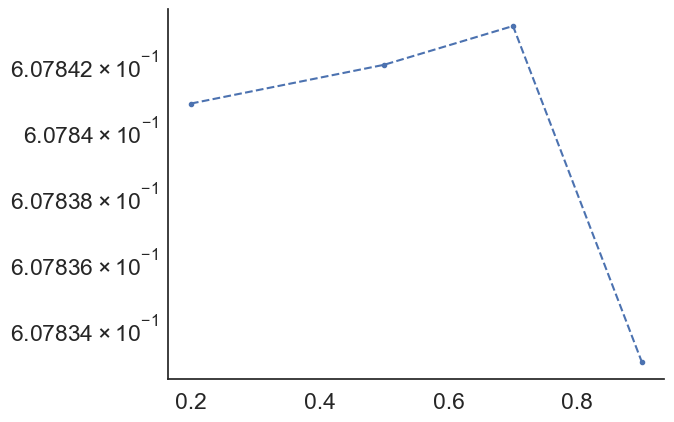

In [17]:
plt.plot(sigma_stim_lst, avg_sigmas, '.--')
plt.yscale('log')
plt.show()

In [18]:
n_cells_lst = [10, 20, 30, 40]

avg_cells = []
std_cells = []

for cell in tqdm(n_cells_lst):
    X, y = data_func(n_cells=cell)
    avg, std = rbf_SVM(X,y)
    avg_cells.append(avg)
    std_cells.append(std)

  0%|                                                     | 0/4 [00:00<?, ?it/s]

making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 25%|██████████▊                                | 1/4 [19:11<57:33, 1151.33s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 50%|█████████████████████▌                     | 2/4 [38:43<38:46, 1163.46s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


 75%|██████████████████████████████▊          | 3/4 [1:01:42<21:01, 1261.81s/it]

3
4
making data
y done
X done
0
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2


100%|█████████████████████████████████████████| 4/4 [1:24:28<00:00, 1267.09s/it]

3
4


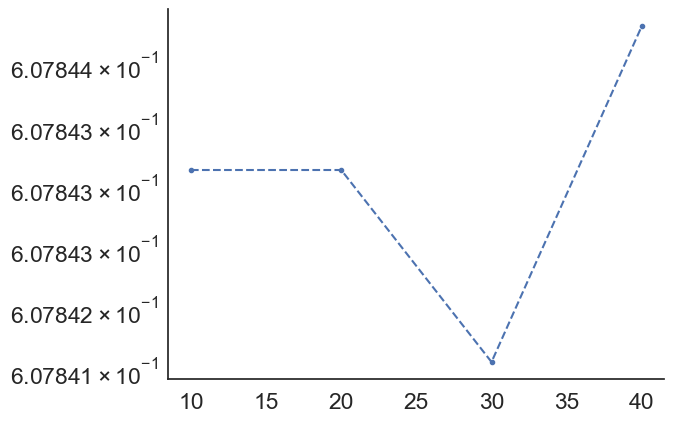

In [19]:
plt.plot(n_cells_lst, avg_cells, '.--')
plt.yscale('log')
plt.show()

##

## Useful code
---


n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
